<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>Автор материала: Валентина Бирюкова (@myltykritik)

# _«Сделай это красиво...»_

Как можно сделать вашу презентацию и графики более красивыми?
Хочу предложить два варианта:
* Делать все в определенной цветовой гамме;
* Использовать уже готовые красивые графики вместо базовых.

В этом туториале коснемся и первого, и второго пункта.

## Цвет
Что нам дает цвет? 
* Во-первых, цветом очень хорошо выделять информацию, именно поэтому, например, для тепловых карт используются цветовые схемы, которые отличаются от схем для графиков со столбцами.
* Во-вторых, хорошо оформленные материалы повышают восприятие и удовольствие от просмотра. Если все делать в разной стилистике и кое-как оформленным, то положительной реакции не стоит ждать.

Я, например, когда мне надо оформить работу, сначала смотрю на [Цветовое колесо](https://color.adobe.com/) и заранее выбираю цвет оформления презентации, если там будет хотя бы несколько графиков. Для совсем официальных и деловых — это голубые цвета. Для менее официальных — это зеленые или золотые оттенки. Но дай мне волю и я всё буду делать в розовых оттенках :)
Чаще всего для оформления подходят монохромные или комплементарные схемы, но каждая для своих типов графиков.

Монохромная схема хороша, когда вам надо показать градации одной величины в рамках пары параметров: например, распределения плотности.

Комплементарные хороши, например, в тепловых картах, где значение корреляции каждой пары из множества признаков может быть в дипазоне [-1, 1]. Или если не корреляция, а сводная таблица, и данные имеют центр распределения и хочется показать, что часть значений сильно меньше центра, а часть больше.

Но иногда нужны просто наборы цветов, если надо показать, напрмер, продажи нескольких товаров на столбчатом графике. Значения между собой особо не зависимы, так что цветом зависимость не надо подчеркивать. Но и тут нужно подбирать цвета, подходящие под общую стилистику: например, пастельные или, наоборот, яркие.

Далее мы увидим примеры под каждый из способов и посмотрим, как что задать с помощью библиотек Python. Для примеров я выбрала пакет seaborn. Очень советую его попробовать. Это надстройка над mathplotlib, изначально делающая симпатичные графики и позволяющая их еще больше улучшать и кастомизировать.

В этом туториале мы поработаем с цветом, обсудим какие схемы для чего нужны, потом построим несколько красивых графиков на все случаи жизни и посмотрим, какие выводы можно делать из графического представления данных. В конце будет пример визуализации данных 'mlbootcamp5_train.csv'- про сердечно-сосудистые заболевания, выполненный в одной цветовой гамме и с пройденными графиками (Приложение 2).

В этом туториале не будет очень подробных разъяснений как работает тот или иной график. Будем лишь частично касатся технической стороны, по большей степени о цвете. Также не будет моделей. Только визуализации.

А сейчас для начала загрузим два набора данных: 'vgsales.csv' - продажи игр, 'data.csv' - рейтинги игр. И немного их предобработаем для корректного использования.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(style = 'darkgrid') #зададим базовое оформление

data = pd.read_csv('../../data/vgsales.csv')
data.dropna(inplace=True)
data['Year'] = data['Year'].apply(lambda x: int(x))
# data['Platform'] = data['Platform'].apply(lambda x: str(x))
data = data[data['Year'] < 2017]
data_sales = data[data['Year'] == 2016][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] #данные по продажам в 4 регинах
data_years = data[((data['Year'] == 2014)|(data['Year'] == 2015)|(data['Year'] == 2016))&((data['Platform'] == 'PS4')|(data['Platform'] == 'WiiU')|(data['Platform'] == 'XOne'))][['Global_Sales', 'Platform', 'Year']]

score = pd.read_csv('../../data/scores.csv')
score.dropna(inplace=True)
score['Critic_Score'] = score['Critic_Score'].apply(lambda x: float(x))
score['User_Score'] = score['User_Score'].apply(lambda x: float(x))

Начнем с графика виолончель. Построим его по продажам игр 4 регионов. Величины даны в миллионах штук. Но для этого посмотрим, какие данные у нас по продажам есть. Возьмем колонку с самыми большими продажами: 'NA_Sales'. Построим распределение и log(x+1) распределение данных. Видим, что данные не очень приятные: немного больших значений и очень длинный хвост из маленьких значений. 

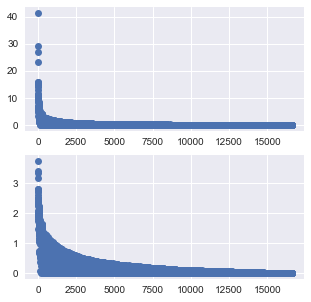

In [2]:
plt.figure(1, figsize=(5, 5))
plt.subplot(211)
plt.plot(data['NA_Sales'], 'o')
plt.subplot(212)
plt.plot(data['NA_Sales'].apply(lambda x: np.log1p(x)), 'o')

Значений с продажами менее 0.5 почти 87%. Вот их и возьмем и построим по ним виолончели.

In [3]:
data_small= data[data['NA_Sales'] < 0.5]
print(data.shape, data_small.shape)
data_small.shape[0]/data.shape[0]

(16287, 11) (14235, 11)


0.8740099465831644

Построим первый график, так сказать, из коробки, без всяких улучшений.
Видим, что он и так не плох, но не идеален.

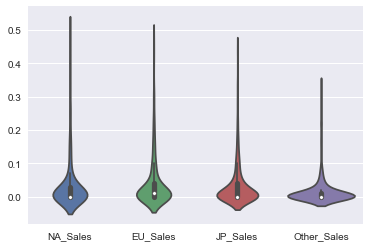

In [4]:
sns.violinplot(data = data_sales[data_sales < 0.5], inner='box')

Теперь мы добрались до улучшения графиков и подбора цветов.

В seaborn есть несколько способов задавать цвета:
* Использовать стандартные обозначения 'g' - green, 'm' - magenta и т.д;
* Использовать rgb (0.1, 0.33, 1.) или дроби для rgb (36/255, 127/225, 213/255), так как в том же цветовом колесе значения rgb в диапазоне от 1 до 255, а в seaborn надо от 0 до 1;
* Использовать встроенные палитры. Вот это самый удобный способ, потому что палитры уже достаточно хорошо подобранные и проверенные временем. Ниже, в Приложении 1, выведены все доступные палитры. Я туда частенько заглядывала при написании туториала, выбирая, какие оттенки голубого или розового брать.

В каждом из графиков у вас попросят color, palette или cmap. На примерах рассмотрим различия.

Итак, начнем красить наши виолончели и делать их красивыми.

* Возьмем палитру 'viridis'. Это последовательные цвета: фиолетовый переходит в желто-зеленый;
* Далее добавим оформление графика: style = 'white'. Есть ещё 'whitegrid', 'dark', 'darkgrid' и 'ticks'. С большинством мы тут познакомимся;
* Увеличим размер картинки: это задается в plt.subplots и параметру figsize передается пара значений размера в дюймах;
* Подберем размер надписей, просто это сделать скалированием шрифта: font_scale=1.5;
* Все это аккуратно передадим в настройки графика и вуаля!

Для подобных графиков так же бы подошел и монотон.

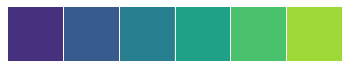

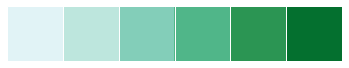

In [5]:
sns_plot = sns.palplot(sns.color_palette('viridis'))
sns_plot = sns.palplot(sns.color_palette('BuGn'))

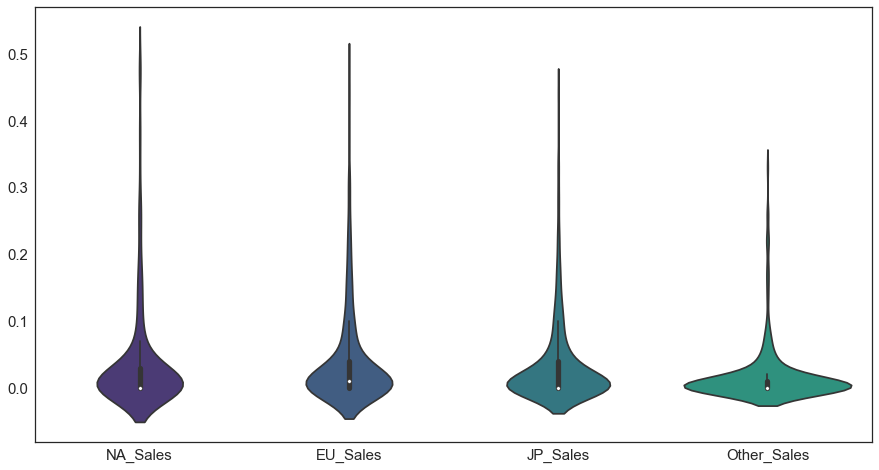

In [6]:
sns.set(style = 'white', font_scale=1.5)
c =  sns.color_palette('viridis')
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(ax = ax, data = data_sales[data_sales < 0.5], inner='box', palette=c)


Помимо плавно переходящих оттенков бывают наборы просто разных цветов, но, например, одной яркости или насыщенности.
Такие цветовые схемы хороши, когда на одном графики надо выделить одинаковые элементы и показать, что они отличаются от других элементов. Как в примере, где у нас данные по трем игровым платформам, глобальным продажам и за три года. Цвет сразу показывает, где одинаковые элементы в каждом году и где разные внутри одного года.

Еще в seaborn есть две опции: если добавить в название к цвету '\_d' (dark), то оттенки будут темнее и переделаны так, что переходы между ними будут менее резкими. Если добвить '\_r' (reverse), то цвета будут идти в обратном порядке.

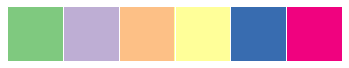

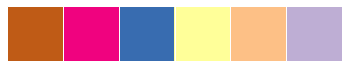

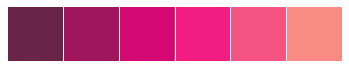

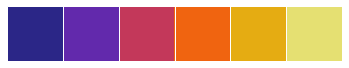

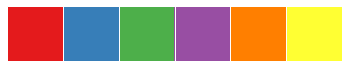

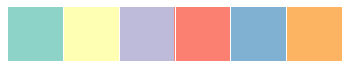

In [7]:
sns.set(style = 'darkgrid')
sns_plot = sns.palplot(sns.color_palette('Accent'))
sns_plot = sns.palplot(sns.color_palette('Accent_r'))
sns_plot = sns.palplot(sns.color_palette('Accent_d'))
sns_plot = sns.palplot(sns.color_palette('CMRmap'))
sns_plot = sns.palplot(sns.color_palette('Set1'))
sns_plot = sns.palplot(sns.color_palette('Set3'))

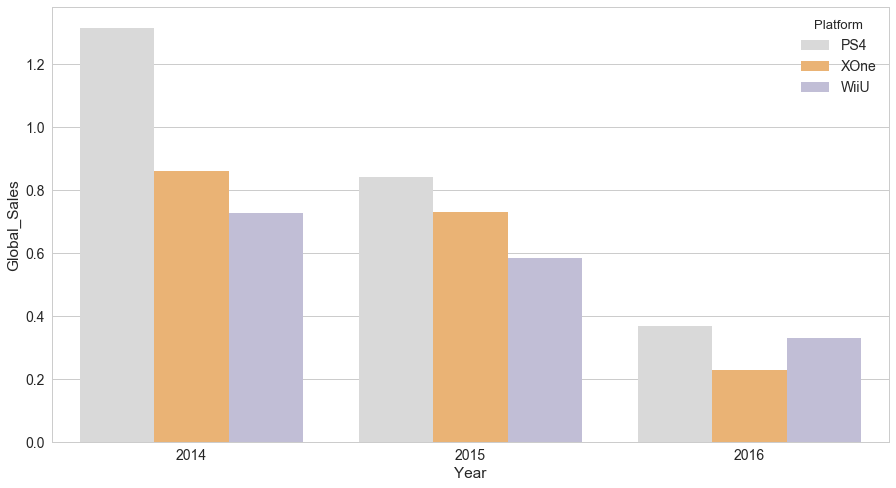

In [8]:
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x = 'Year', y = 'Global_Sales', hue = 'Platform', data = data_years, palette='Set3_r', ci = None)

В отдельную группу (и функцию sns.cubehelix_palette) выделины специальные наборы цветов, которые представляют из себя один оттенок, с линейно увеличивающейся (или уменьшающейся) яркостью. Это свойство позволяет печатать графики в оттенках серого без потери читабельности. А также позволяет читать их людям, которые не различают цвета.

sns.cubehelix_palette настраивается разнообразными способами, можно задать любой базовый оттенок, любую насыщенность и яркость, а также, количество цветов, которое потребуется для отрисовки графика (автоматически тоже работает, но лучше указывать, если известно заранее, потому что, таким образом, будут предложены наиболее контрастные варианты).

Выгоду этот набор приносит, например, в тепловых картах, на что мы посмотрим ниже.

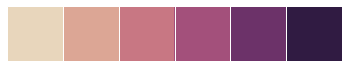

In [9]:
sns.set(style = 'darkgrid')
sns_plot = sns.palplot(sns.cubehelix_palette(start=0, rot = 0.5, gamma = 1, hue= 1))

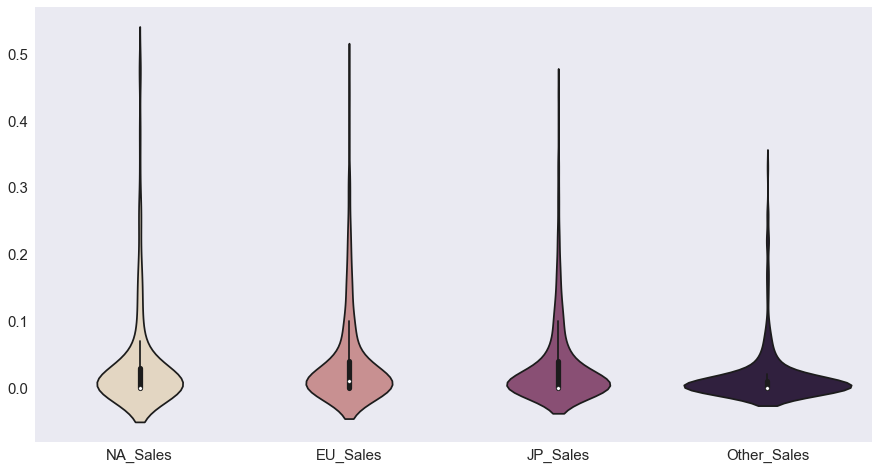

In [10]:
sns.set(style = 'dark', font_scale=1.5)
c =  sns.cubehelix_palette(n_colors=4, start=0, rot = 0.5, gamma = 1, hue= 1)
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(ax = ax, data = data_sales[data_sales < 0.5], inner='box', palette=c)

Выше были представлены оформления: white, whitegrid и dark. Каждый подходит для своих нужд и можно экспериментировать, что вам больше нравится. 

Также, вы могли заметить, что во всех примерах был параметр palette. Ему всегда передается сразу список цветов. Параметру color передается один цвет, но потом в самом графике ему могут добавляться оттенки, как это бывает в jointplot. Cmap используется тогда, когда о данных ничего не известно и не ясно, сколько и каких цветов может потребоваться. Функциям типа cubehelix_palette нужно напрямую передавать параметр as_cmap=True, а разные наборы цветов из Приложения 1 можно использовать и так.

## Графики

Теперь плавно перейдем к теме красивых готовых графиков.

«Сделай мне красиво» — может оказаться головной болью, если поджимает время или чувство прекрасного напрочь утрачено. Но и тут помогут встроенные в seaborn готовые графики. А я лишь немного о них расскажу.

Любой scatter plot украсят шестиугольники — просто добавьте kind='hex'. А также распределения используемых в нем величин. 

Но с цветами придется немного повозиться. Парметру color можно передать традиционные 'r' и 'g', но это не интресно. Но можно выбрать любую нравящуюся вам палитру, посмотреть, как график выглядит при каждом из цветов и передать параметру color именно его. Мне очень нравится палитра 'spring', так что тут я использую ее.

На графиках виден явный тренд и место основного скопления пар оценок. Можно сказать, что и критики, и пользователи больше всего ставят оценок, равных 80% от максимума.

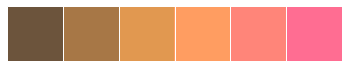

In [11]:
sns.set(style='darkgrid')
sns_plot=sns.palplot(sns.color_palette('spring_d'))

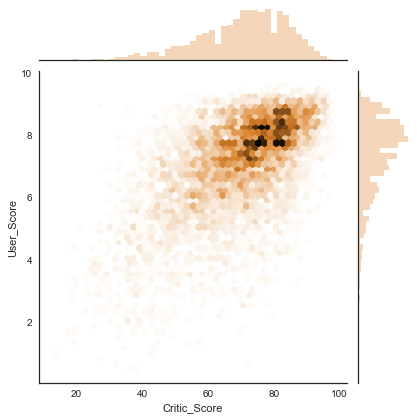

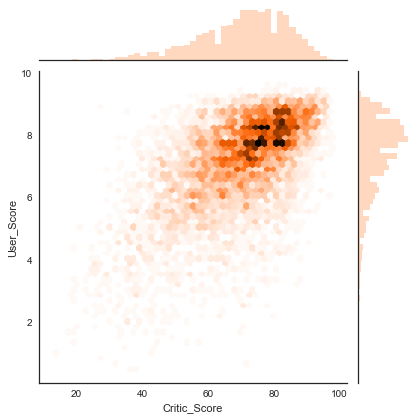

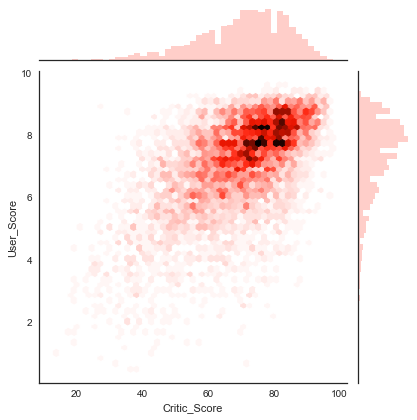

In [12]:
for i in range(2, 5):
    sns.set(font_scale=1, style="white")
    c =  sns.color_palette('spring_d')[i]
    sns_jointplot = sns.jointplot('Critic_Score', 'User_Score', data=score, kind='hex', color=c, size=6, stat_func=None)


Графики плотности тут тоже хороши. Для них можно выбрать как один из полученных ранее цветов, так и любой rgb. Главное, помнить, что rgb цвета должны быть в пределах от 0 до 1.

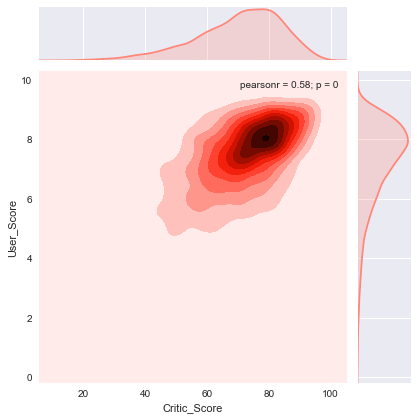

In [13]:
sns.set(font_scale=1, style="darkgrid")
c =  sns.color_palette('spring_d')[4]
sns_jointplot = sns.jointplot('Critic_Score', 'User_Score', data=score, kind='kde', color=c, size=6)

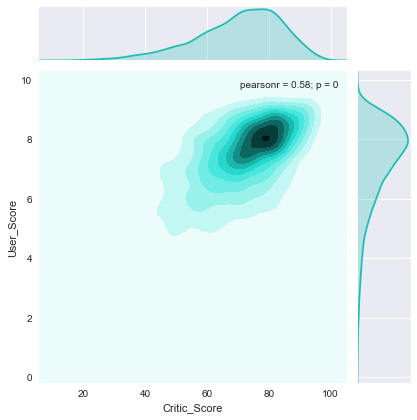

In [14]:
sns.set(font_scale=1, style="darkgrid")
c =  sns.color_palette('viridis')[3]
sns_jointplot = sns.jointplot('Critic_Score', 'User_Score', data = score, kind='kde', color = (26/255, 191/255, 181/255), size=6)

Теперь настала очередь красивых корреляционных матриц.

Тут полезны, так называемые diverging_palette (расходящиеся цвета), также вынесенные в отдельную функцию. Важно задать цвет минимального значения, максимального значения, будет ли центр ярким или, наоборот, темным и некоторые другие характеристики. И еще нужно не забыть указать параметр as_cmap=True, чтобы тепловой карте передался colormap, а не список цветов.

Подобными характеристиками обладают и некоторые наборы цветов, например cmap='coolwarm'. А в некоторых готовых наборах центр, наоборот черный. В diverging_palette тоже можно это задать.

На графике наглядно видно, между какими парами признаков положительные или отрицательные, маленькие или большие корреляции. Центр задался автоматически в районе 0.35-0.4, так как максимальное значение 1, а минимальное только -0.25.

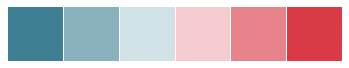

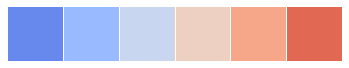

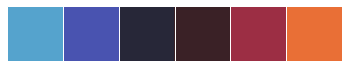

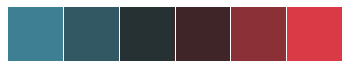

In [15]:
sns.set(style = 'darkgrid')
sns_plot = sns.palplot(sns.diverging_palette(220, 10))
sns_plot = sns.palplot(sns.color_palette('coolwarm'))
sns_plot = sns.palplot(sns.color_palette('icefire'))
sns_plot = sns.palplot(sns.diverging_palette(220, 10, center='dark'))

In [16]:
data_corr = score[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
corr = data_corr.corr()

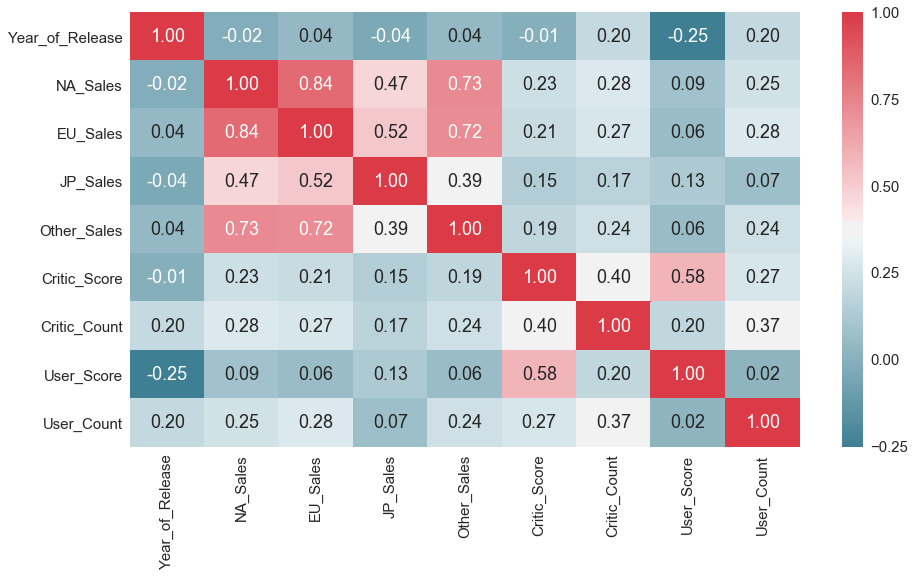

In [17]:
sns.set(font_scale=1.5)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap=cmap, annot=True, ax=ax, fmt='.2f')

В seaborn также можно делать очень наглядные сводные таблицы. И раскрашивать их двумя способами:
* Опять же идти от маленького значения через центр, который можно указать самостоятельно, к наибольшему значению (первая раскраска);
* И идти от маленького значения к большему, наращивая насыщенность цвета (вторая раскраска с замечательным названием 'inferno').

И в первой, и во второй сводной таблице очень много маленьких значений и небольшое количество больших значений. Есть пропуски.

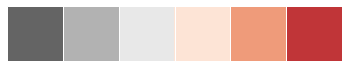

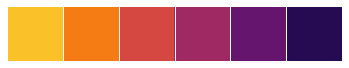

In [18]:
sns.set(style = 'darkgrid')
sns_plot = sns.palplot(sns.color_palette('RdGy_r'))
sns_plot = sns.palplot(sns.color_palette('inferno_r'))

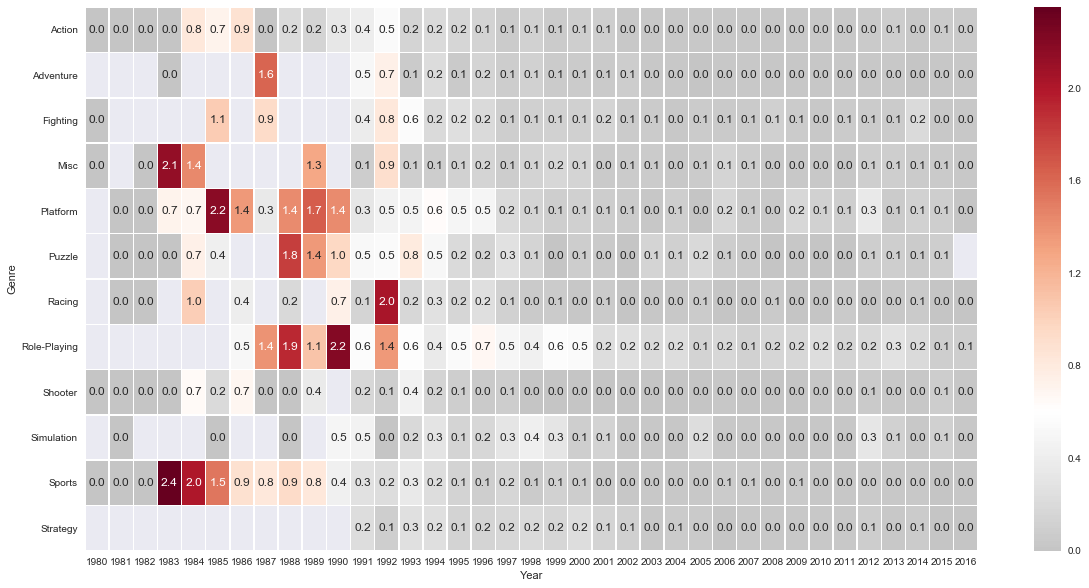

In [19]:
fl = pd.pivot_table(data, values='JP_Sales', index='Genre', columns='Year')
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(fl, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap = 'RdGy_r', center=0.6)

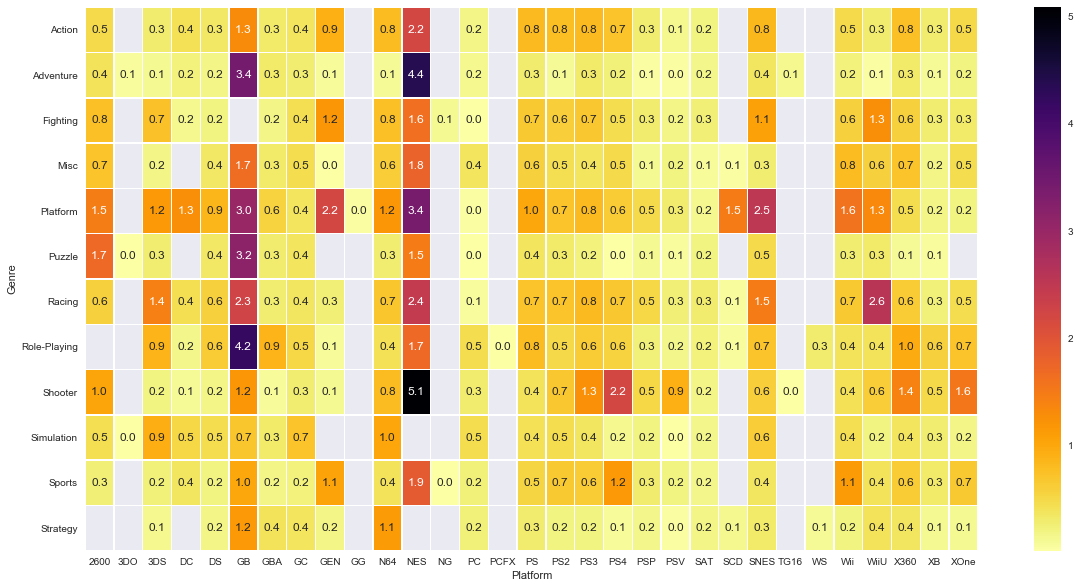

In [20]:
fl = pd.pivot_table(data,values='Global_Sales',index='Genre',columns='Platform')
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(fl, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap = 'inferno_r')

И напоследок, моя любимая визуализация пропусков в данных.

Ведь порой важно знать не только сколько у тебя пропусков в данных, но и как они распределены.

Здесь лучше всего выбирать разные по яркости цвета. Например, синий и красный не подойдут, потому что будет очень сложно разглядеть тонкие красные полосочки на темном синем фоне.

Сразу видно, что в части с оценками у нас больше пропусков. 

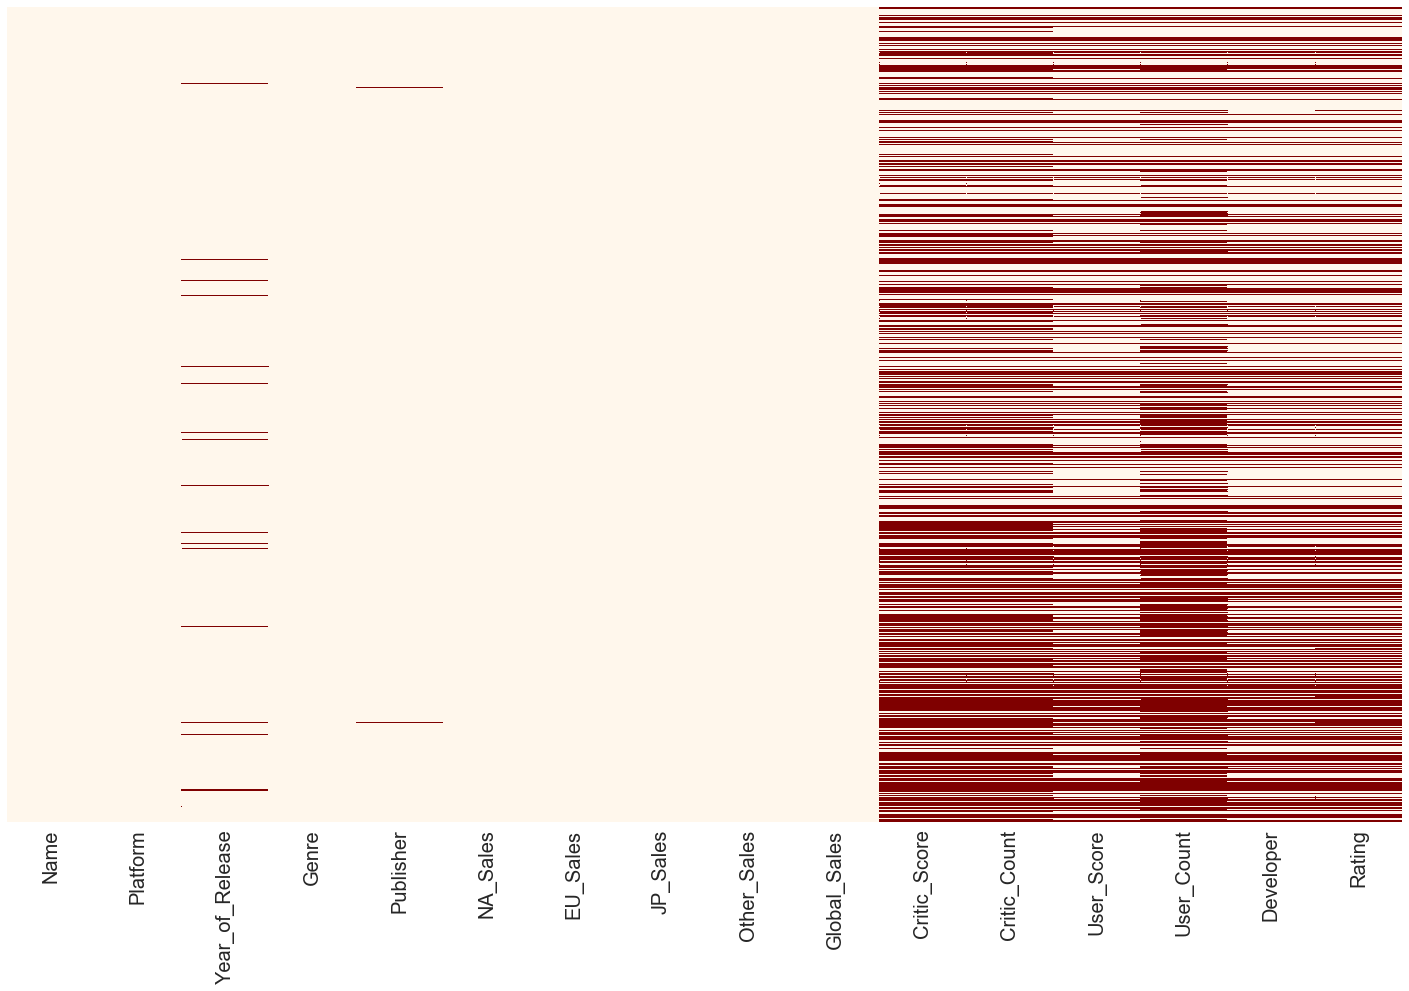

In [21]:
score = pd.read_csv('../../data/scores.csv')
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(25,15))
sns_heatmap = sns.heatmap(score.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

Спасибо за внимание! Теперь ваши презентации будут не только информативными, но и красивыми, выполненными в одном стиле и цвете.
На этом можно закрыть туториал, а можно почитать Приложение 2, где я для примера делаю визуальный анализ данных про сердечно-сосудистые заболевания в одном стиле.

А еще можно поставить + и написать комментарий под постом :)

# Приложение 1

Accent
Blues
BrBG
BuGn
BuPu
CMRmap
Dark2
GnBu
Greens
Greys
OrRd
Oranges
PRGn
Paired
Pastel1
Pastel2
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples


C:\Users\Valentina\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Set1
Set2
Set3
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
icefire
inferno
magma
mako
nipy_spectral
ocean
pink
plasma
prism
rainbow
rocket
seismic
spring
summer
tab10
tab20
tab20b
tab20c
terrain
viridis
vlag
winter


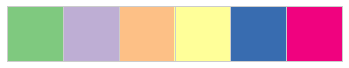

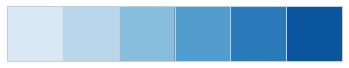

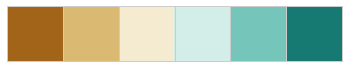

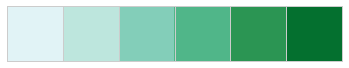

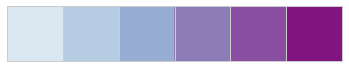

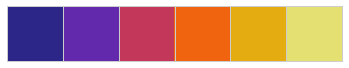

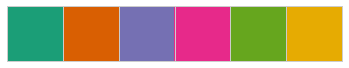

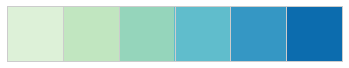

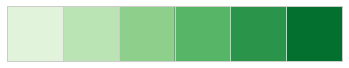

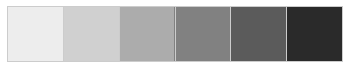

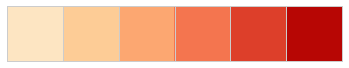

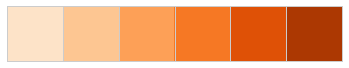

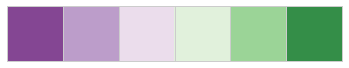

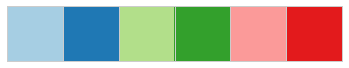

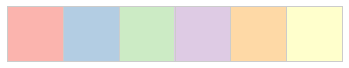

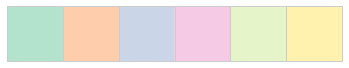

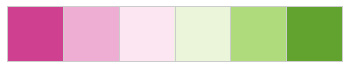

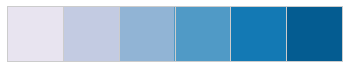

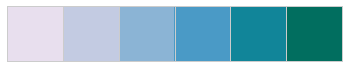

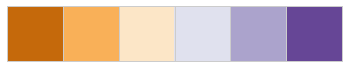

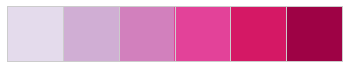

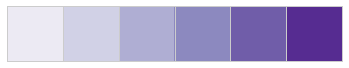

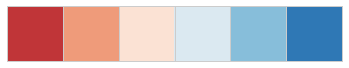

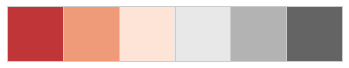

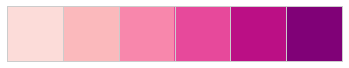

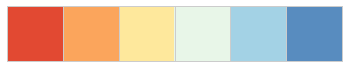

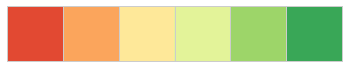

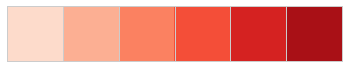

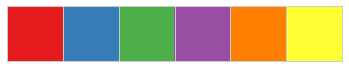

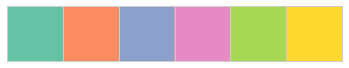

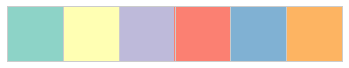

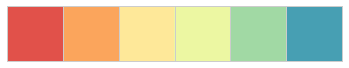

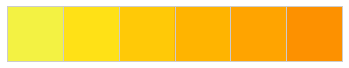

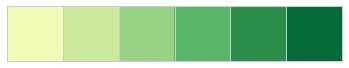

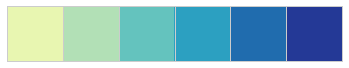

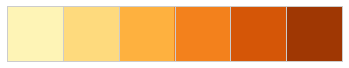

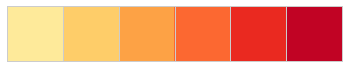

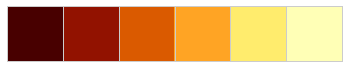

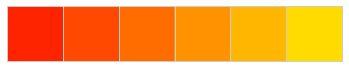

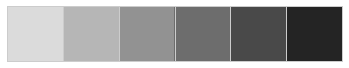

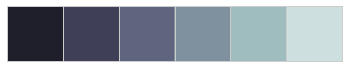

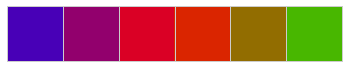

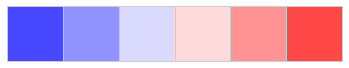

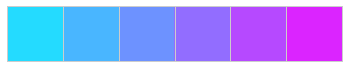

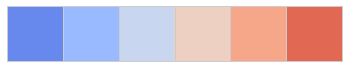

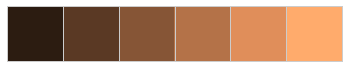

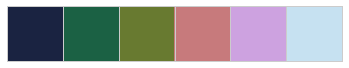

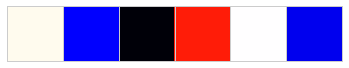

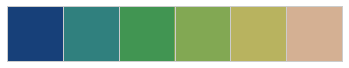

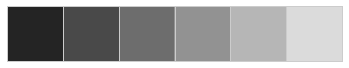

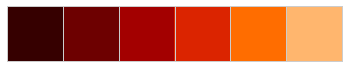

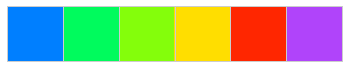

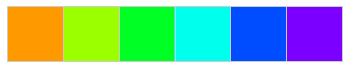

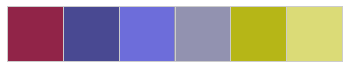

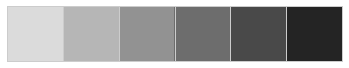

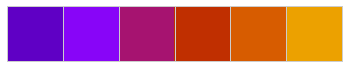

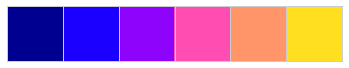

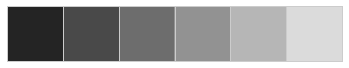

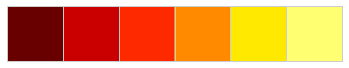

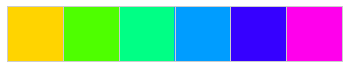

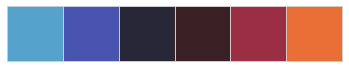

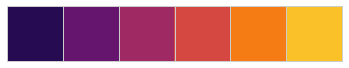

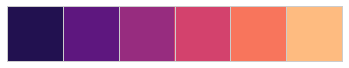

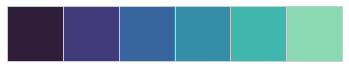

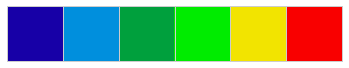

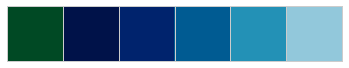

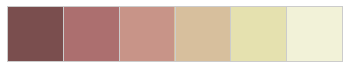

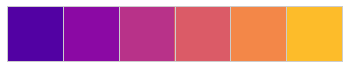

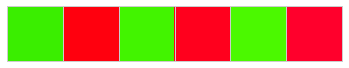

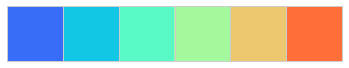

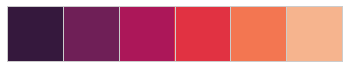

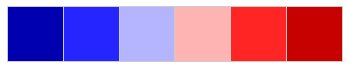

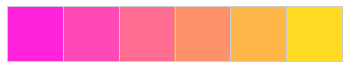

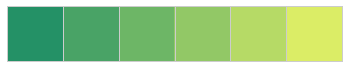

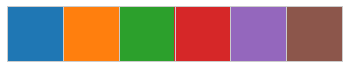

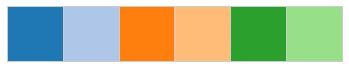

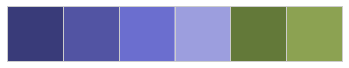

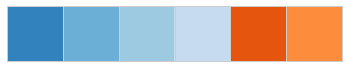

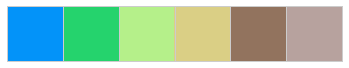

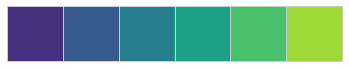

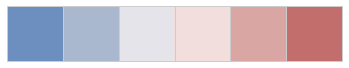

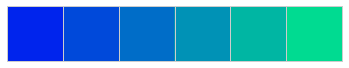

In [22]:
k = 'Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r,\
BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, \
PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, \
PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, \
PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, \
RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, \
Set2_r, Set3, Set3_r, Spectral, Spectral_r, tab20c, \
Wistia, Wistia_r, YlGn, YlGnBu, \
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, \
autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, \
cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, \
cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, \
gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, \
gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg,\
gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, \
hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, magma, \
magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, \
pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, \
rocket, rocket_r, seismic, seismic_r, spring, \
spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, \
tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, \
vlag, vlag_r, winter, winter_r'
k = ' '.join(k.split('_r'))
k = ' '.join(k.split(','))
k = k.split()
k.remove('gist')
k.remove('gist')
k.remove('ainbow')
k.remove('ainbow')
k.append('gist_rainbow')
sns.set(style = 'whitegrid')
for i in list(sorted(set(k))):
    print(i)
    sns_plot = sns.palplot(sns.color_palette(i))
#     sns_plot.savefig(i+'.png')\


# Приложение 2

Скачаем данные по сердечно-сосудистым заболеваниям и проведем первичный визуальный анализ. Использовать будем желто-зелено-синюю цветовую схему.

In [23]:
sns.set(style = 'white', font_scale=1.5) #зададим базовое оформление
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', index_col='id')
df = df.reset_index()
df.drop('id', axis=1, inplace=True)
df['age'] = df['age'].apply(lambda x: int(x/365))

In [24]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


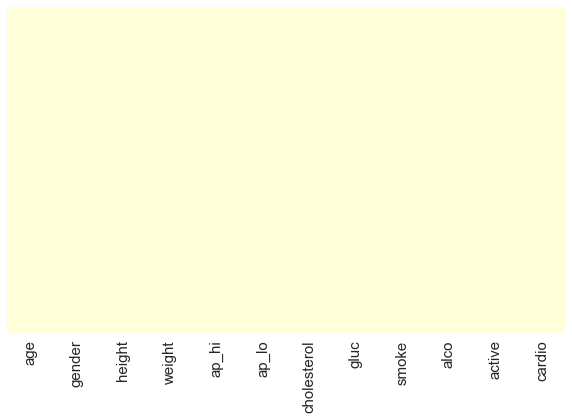

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns_heatmap = sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='YlGnBu')

Радует, что пропусков нет. А как дела с чистотой данных?

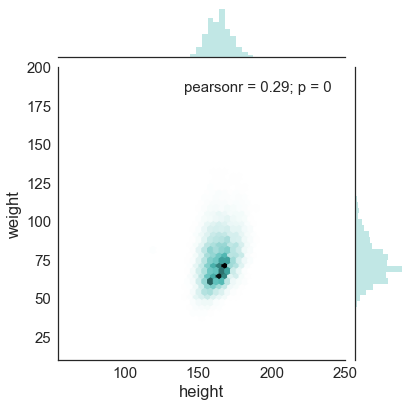

In [26]:
c =  sns.color_palette('YlGnBu')[2]
sns_jointplot = sns.jointplot('height', 'weight', data = df, kind='hex', size=6, color=c)

Маленькая картинка и большое пустое пространство говорят о том, среди данных о росте и весе есть выбросы. Что же, поставим на свое усмотрение наиболее логичные границы. Этеншн! Скорее всего, просто удалять данные не стоит, а лучше их обработать, но для наглядности мы их удалим, чтобы проверить гипотезу, что выбросы есть.

In [27]:
df = df[(df['height'] > 130)&(df['height'] < 200)]
df = df[(df['weight'] > 40)&(df['weight'] < 140)]

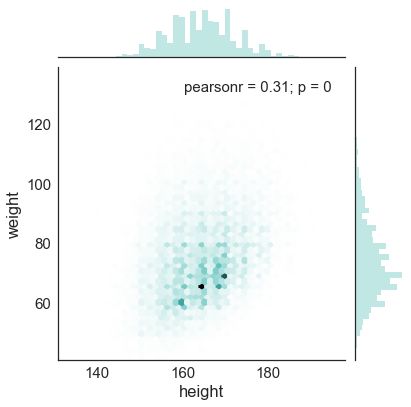

In [28]:
c =  sns.color_palette('YlGnBu')[2]
sns_jointplot = sns.jointplot('height', 'weight', data = df, kind='hex', size=6, color=c)

Да, так и есть, выбросы были.

Посмотрим далее на верхнее и нижнее давление.

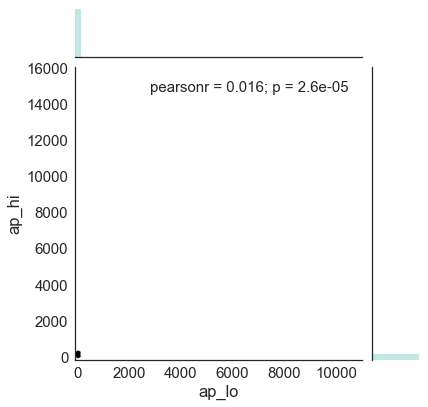

In [29]:
c =  sns.color_palette('YlGnBu')[2]
sns_jointplot = sns.jointplot('ap_lo', 'ap_hi', data = df, kind='hex', size=6, color=c)

Похоже, тут совсем беда и есть невероятно огромные значения. Опять для наглядности просто удалим их, а впоследствии вернемся и обработаем (но уже не в этом туториале!).

In [30]:
df = df[(df['ap_lo'] > 40)&(df['ap_lo'] < 180)]
df = df[(df['ap_hi'] > 50)&(df['ap_hi'] < 200)]

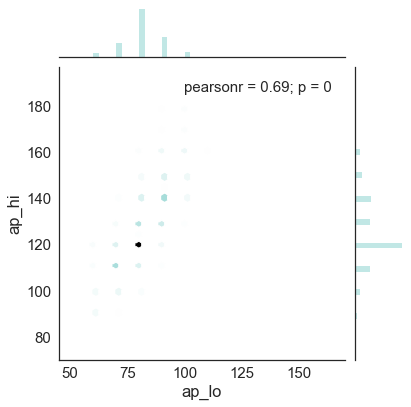

In [31]:
c =  sns.color_palette('YlGnBu')[2]
sns_jointplot = sns.jointplot('ap_lo', 'ap_hi', data = df, kind='hex', size=6, color=c)

Так намного лучше и корреляция стала выше.

Посмотрим на виолончели данных веса, роста и давления.

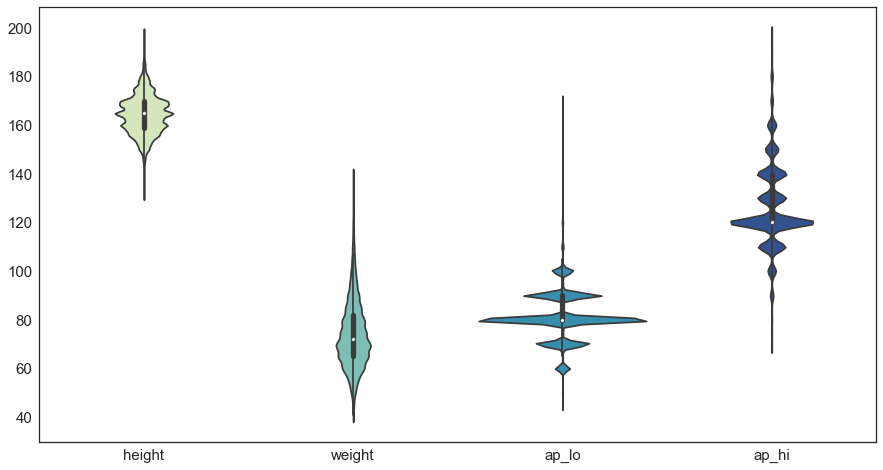

In [32]:
df1 = df[['height', 'weight', 'ap_lo', 'ap_hi']]
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(ax = ax, data = df1, inner='box', palette='YlGnBu')

Медианное значение роста около 165 см, веса - 75 кг, нижнего артериального давления - 80 мм ртутного столба, верхнего - 120 мм ртутного столба. 

Теперь поиграемся с данными и посмотрим, есть ли разница в весе у пьющих и непьющих представителей разных полов.

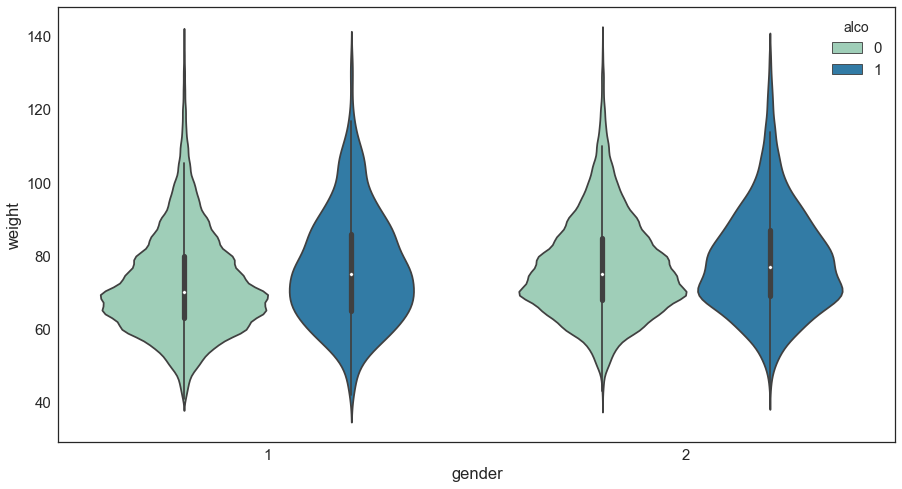

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x = 'gender', y = 'weight', ax = ax, data = df, hue='alco', inner='box', palette='YlGnBu')

Выходит, что непьющие женщины имеют медианный вес меньше, чем пьющие. А у мужчин такой явной разницы нет.

Подобные графики можно строить на любые тройки данных: вес, рост, давление, пол, активность, курение, алкоголь и т.д.

Пришло время гафика корреляций.

In [34]:
corr = df.corr()

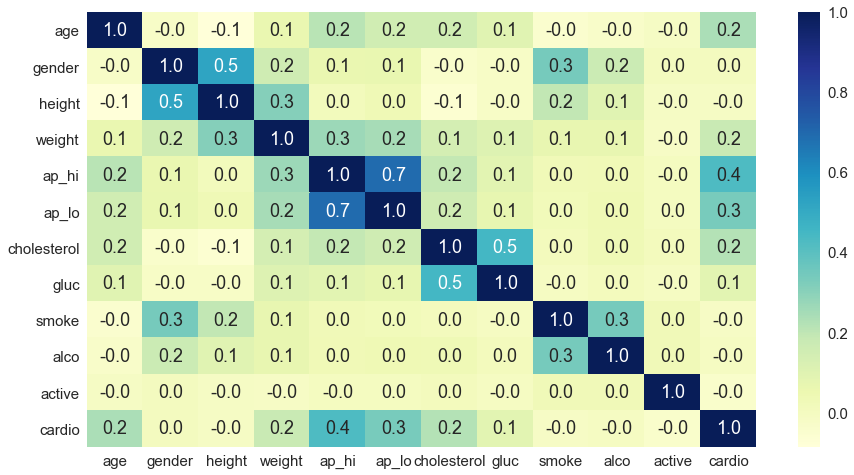

In [35]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', annot=True, ax=ax, fmt='.1f')

Видим, между какими парами фич есть корреляция, а между какими нет. Значимой отрицательной корреляции нет почти негде. 

Вот так, достаточно просто и быстро можно построить красивую визуализацию к вашему проекту или презентации.

Плюсики и комментарии приветствуются :)